Vijay Kumar Reddy Almalachervu

### The IMDB dataset

**Loading the IMDB dataset**

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
!pip install tensorflow
!pip install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [12]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(16, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1667 - accuracy: 0.7917 - val_loss: 0.1133 - val_accuracy: 0.8654
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0792 - accuracy: 0.9100 - val_loss: 0.0874 - val_accuracy: 0.8874
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0522 - accuracy: 0.9449 - val_loss: 0.0836 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0381 - accuracy: 0.9634 - val_loss: 0.0849 - val_accuracy: 0.8833
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0273 - accuracy: 0.9759 - val_loss: 0.0878 - val_accuracy: 0.8807
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0208 - accuracy: 0.9843 - val_loss: 0.0916 - val_accuracy: 0.8762
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0162 - accuracy: 0.9881 - val_loss: 0.0929 - val_accuracy: 0.8766
Epoch 8/20
30

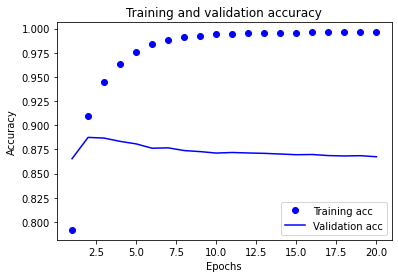

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers


model = keras.Sequential()
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dense(1, activation="sigmoid",activity_regularizer=regularizers.L2(0.01)))


model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 3s 82ms/step - loss: 0.1565 - accuracy: 0.7771 - val_loss: 0.0922 - val_accuracy: 0.8812
Epoch 2/30
30/30 [==============================] - 3s 111ms/step - loss: 0.0729 - accuracy: 0.9091 - val_loss: 0.0887 - val_accuracy: 0.8869
Epoch 3/30
30/30 [==============================] - 4s 120ms/step - loss: 0.0533 - accuracy: 0.9385 - val_loss: 0.0955 - val_accuracy: 0.8805
Epoch 4/30
30/30 [==============================] - 3s 105ms/step - loss: 0.0425 - accuracy: 0.9545 - val_loss: 0.0988 - val_accuracy: 0.8833
Epoch 5/30
30/30 [==============================] - 2s 77ms/step - loss: 0.0344 - accuracy: 0.9659 - val_loss: 0.1042 - val_accuracy: 0.8768
Epoch 6/30
30/30 [==============================] - 2s 55ms/step - loss: 0.0315 - accuracy: 0.9681 - val_loss: 0.1068 - val_accuracy: 0.8781
Epoch 7/30
30/30 [==============================] - 2s 56ms/step - loss: 0.0291 - accuracy: 0.9721 - val_loss: 0.1119 - val_accuracy: 0.8742
Epoch 8/30

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

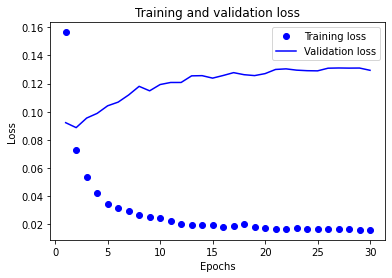

In [17]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [19]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers


model = keras.Sequential()
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh",activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 3s 71ms/step - loss: 0.1697 - accuracy: 0.7945 - val_loss: 0.1040 - val_accuracy: 0.8811
Epoch 2/30
30/30 [==============================] - 2s 57ms/step - loss: 0.0859 - accuracy: 0.9135 - val_loss: 0.0992 - val_accuracy: 0.8785
Epoch 3/30
30/30 [==============================] - 2s 57ms/step - loss: 0.0630 - accuracy: 0.9360 - val_loss: 0.0982 - val_accuracy: 0.8780
Epoch 4/30
30/30 [==============================] - 2s 58ms/step - loss: 0.0499 - accuracy: 0.9507 - val_loss: 0.1036 - val_accuracy: 0.8774
Epoch 5/30
30/30 [==============================] - 2s 57ms/step - loss: 0.0423 - accuracy: 0.9589 - val_loss: 0.1062 - val_accuracy: 0.8727
Epoch 6/30
30/30 [==============================] - 2s 58ms/step - loss: 0.0355 - accuracy: 0.9650 - val_loss: 0.1064 - val_accuracy: 0.8743
Epoch 7/30
30/30 [==============================] - 2s 57ms/step - loss: 0.0335 - accuracy: 0.9667 - val_loss: 0.1079 - val_accuracy: 0.8694
Epoch 8/30
30

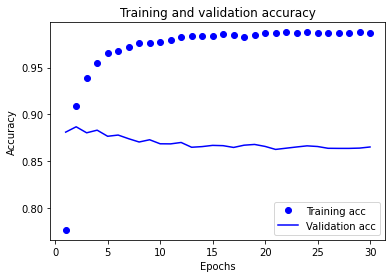

In [21]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [22]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 42ms/step - loss: 0.4477 - accuracy: 0.8291
Epoch 2/4
49/49 [==============================] - 2s 35ms/step - loss: 0.2603 - accuracy: 0.9080
Epoch 3/4
49/49 [==============================] - 2s 36ms/step - loss: 0.1974 - accuracy: 0.9306
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3165 - accuracy: 0.8739


In [23]:
results

[0.3165355920791626, 0.8739200234413147]

In [24]:
model.predict(x_test)

array([[0.14385211],
       [0.9993652 ],
       [0.63045466],
       ...,
       [0.08919382],
       [0.04717538],
       [0.5642899 ]], dtype=float32)

##Summary:

To test the performance, I used a 2, 3, and 6-layered neural network with 16, 64, and 64 hidden neurons.
One significant finding I made was that, once it passes the threshold, it will train and perform essentially identically regardless of how many layers are stacked up.
Keras is a model. Sequential() It has the same organizational structure as input layer, hidden layers, and output layer.
The initialization of the Sequential model, where we can stack layers, is done in the line above. model. Dense (64, Tanh activation)
The above line indicates that we are using the tanh activation function to add a new hidden layer with 64 dense units.
When I refer to 64 hidden units, we can presume that I am referring to 64 neurons that are being formed in the layer to learn the vector-based input.
The term "transfer function" also refers to the activation function. If the output range of the function is constrained, just sigmoid-squash the value to 1 that is above it. As non-linear functions, they. model.add(Dropout(0.5))
When we encounter an overfitting circumstance, the significance of Dropout is helpful.
Hey, could you kindly drop off a few of my neurons at random, as it results in overfitting? When I say 0.5, it means that 50% of my neurons are no longer functioning.
I've tried using L1 and L2 regularizes, but it hasn't had much of an impact; instead, performance has suffered.
My opinion is that the model is saturated, and the best validation accuracy we can obtain is between 86 and 87 percent.
To examine the performance metrics on the loss, binary crossentrophy was replaced with mean square error.
As a result, validation loss has done well. When using binary crossentrophy, the validation loss starts out at 0.5; however, when using mse, it drops to 0.1.
The vanishing gradient problem makes Relu the best function among sigmoid and tanh functions. Tanh performs similarly to Tanh in this situation.

##Training and Validation accuracies are listed below:

Traing and validation accuracies for 2 dense layers ,16 hidden units is 99.61 and 86.74 respectively


Traing and validation accuracies for 3 dense layers, 64 hidden units is 98.70 and 86.54 respectively


Traing and validation accuracies for 6 dense layers,  64 hidden units is 98.62 and 86.16 respectively

